In [1]:
import pandas as pd
import os
import calendar
import shapefile as shp
import adjustText as aT
import numpy as np
#Matplotlib forms basis for visalization in Python
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

#Increase the default plot size and set the color scheme
plt.rcParams['figure.figsize'] = 8, 8
plt.rcParams['image.cmap'] = 'viridis'


In [2]:

#Import Excel files
stats = pd.read_csv('2019_ene_junio.txt',  sep='\t+', engine='python') 


In [3]:
from pandas import ExcelWriter
from pandas import ExcelFile
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('VentasGanado.xlsx', engine='xlsxwriter')

In [4]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected = True)

# REPORTE DE LA UNIDAD DE BOVINOS

## Ganado bovino (cabezas) lechero por entidad federativa

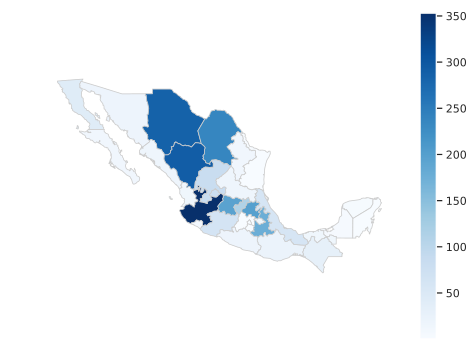

In [11]:
import geopandas as gpd
fp = "mexico.shp"
#reading the shape file by using reader function of the shape lib
map_df = gpd.read_file(fp)

map_df["center"] = map_df["geometry"].centroid
map_df_points = map_df.copy()
map_df_points.set_geometry("center", inplace = True)

data_for_map = pd.read_csv('bovinoLeche.csv')
merged = map_df.set_index('ESTADO').join(data_for_map.set_index('state'))
# set a variable that will call whatever column we want to visualise on the map
variable = 'total producted'
# set the range for the choroplethvmin, 
vmin,vmax = 0.350, 353
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(8, 6))
ax.axis('off')

# create map
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', 
                           norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)


Fuente: [Datos sobre la produccion pecuaria, INEGI](https://www.gob.mx/siap/documentos/poblacion-ganadera-136762?idiom=es)

In [344]:
useful_cols = ['MES', 'VENTAS', 'SUBGRUPO', 'GRUPO', 'CAPITULO', 'LABORATORIO', 'MAIN_SPECIE', "PRODUCTO"]
bool_series = (stats.LABORATORIO.str.startswith('CEVA', na = False))&(stats.MAIN_SPECIE.str.startswith('Ganadero', na = False))
ventas =stats[useful_cols]
df=ventas[bool_series]

## Market Shared

### Market shared por laboratorios en el 2019

In [345]:
market = stats.groupby('LABORATORIO')['LABORATORIO','VENTAS'].sum().head().sort_values(by = "VENTAS", ascending=False)
market

,VENTAS
LABORATORIO,
BIAH,8.546221e+08
BAYER,6.676613e+08
CEVA,1.859545e+08
BIOZOO,1.227857e+08
BIMEDA,2.059768e+07


In [346]:
trace0 = go.Pie(labels=market.index, values=market["VENTAS"])
# Define the data array
data = [trace0]

# Set the title
layout = {'title': 'Market shared por laboratorios'}

#Create a figure and plto it
fig = go.Figure(data = data, layout = layout)
iplot(fig, show_link = False)

### Market shared por laboratorio en el sector ganadero (2019)

In [347]:
bool_series = stats.MAIN_SPECIE.str.startswith('Ganadero', na = False)
sector = stats[bool_series].groupby('LABORATORIO')['LABORATORIO','VENTAS'].sum().head().sort_values(by = "VENTAS", ascending=False)
sector

,VENTAS
LABORATORIO,
BAYER,4.730569e+08
BIAH,1.511624e+08
BIOZOO,9.309773e+07
CEVA,1.517387e+07
BIMEDA,1.170077e+07


In [348]:
trace0 = go.Pie(labels=sector.index, values=sector["VENTAS"])
# Define the data array
data = [trace0]

# Set the title
layout = {'title': 'Market shared sector ganadero'}

#Create a figure and plto it
fig = go.Figure(data = data, layout = layout)
iplot(fig, show_link = False)

## Tendencia de ventas en Ceva durante el 2019 (Ganaderia)

In [349]:
total = df.groupby('MES')['VENTAS'].sum().to_frame()
fluron = df[df.PRODUCTO.str.startswith('FLURON', na = False)].groupby('MES')['VENTAS'].sum().to_frame()
fluron.columns = ['FLURON']
velactis = df[df.PRODUCTO.str.startswith('VELACTIS', na = False)].groupby('MES')['VENTAS'].sum().to_frame()
velactis.columns = ['VELACTIS']
amoclox = df[df.PRODUCTO.str.startswith('AMOCLOX', na = False)].groupby('MES')['VENTAS'].sum().to_frame()
amoclox.columns = ['AMOCLOX']

tendencia = total.join(amoclox).join(velactis).join(fluron).join(sinReg)

# Create a line (trace) for the global sales
trace0 = go.Scatter(x = tendencia.index, y = tendencia['VENTAS'], name = 'Ventas globales')


# Create a line (trace) for the number of amoclox
trace1 = go.Scatter( x = tendencia.index, y = tendencia['AMOCLOX'], name = 'Ventas Amoclox')

# Create a line (trace) for the number of fluron
trace2 = go.Scatter( x = tendencia.index, y = tendencia['FLURON'], name = 'Ventas Fluron')

# Create a line (trace) for the number of velactis
trace3 = go.Scatter( x = tendencia.index, y = tendencia['VELACTIS'], name = 'Ventas Velactis')

# Define the data array
data = [trace0, trace1, trace2, trace3]

# Set the title
layout = {'title': 'Tendencia en las ventas mensuales de CEVA en el 2019'}

#Create a figure and plto it
fig = go.Figure(data = data, layout = layout)
iplot(fig, show_link = False)

## El Top 5 de los productos mas vendidos por CEVA

In [350]:
df.groupby('PRODUCTO')['PRODUCTO','VENTAS'].sum().head().sort_values(by = "VENTAS", ascending=False)

,VENTAS
PRODUCTO,
AMOCLOX S,1356188.0
CEVARELIN 20 ML,946800.0
CEVAXEL RTU 250 ML,846630.0
CEFAVET 30 X 10 ML MX,708592.0
CEVAXEL RTU 100 ML,56440.0


In [351]:
trace0 = go.Pie(labels=df["PRODUCTO"], values=df["VENTAS"])
# Define the data array
data = [trace0]

# Set the title
layout = {'title': 'Ventas por producto en el 2019'}

#Create a figure and plto it
fig = go.Figure(data = data, layout = layout)
iplot(fig, show_link = False)